## Exercises

## Create a new notebook, random_forests, and work with titanic data to do the following:

1.Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

2.Evaluate your results using the model score, confusion matrix, and classification report.

3.Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4.Run through steps increasing your min_samples_leaf and decreasing your max_depth.

5.What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [1]:
# custom modules for data prep:
import acquire as a
import prepare as p
import model as m

# tabular manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# ML stuff:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree


# import our Random Forest model from sklearn:
from sklearn.ensemble import RandomForestClassifier

In [2]:
titanic=a.get_titanic_data()

this file exists, reading csv


In [3]:
titanic=p.prep_titanic(titanic)
titanic.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1


In [4]:
train,val,test=p.splitting_data(titanic,'survived')

In [5]:
train_encoded,val_encoded,test_encoded=m.preprocess_titanic(train,val,test)

### for train_encoded

In [6]:
train_encoded.head(3)

,survived,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
776,0,3,0,0,7.750,1,1,0,1
829,1,1,0,0,80.000,1,0,1,0
215,1,1,1,0,113.275,0,0,0,0


In [7]:
X_train, y_train = train_encoded.drop(columns='survived'), train_encoded.survived
X_validate, y_validate = val_encoded.drop(columns='survived'), val_encoded.survived
X_test, y_test = test_encoded.drop(columns='survived'), test_encoded.survived

In [8]:
X_train.head(3)

,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
776,3,0,0,7.750,1,1,0,1
829,1,0,0,80.000,1,0,1,0
215,1,1,0,113.275,0,0,0,0


In [9]:
y_train.head(3)

776    0
829    1
215    1
Name: survived, dtype: int64

## Baseline prediction & accuracy

In [10]:
y_train.value_counts()

survived
0    329
1    205
Name: count, dtype: int64

In [11]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [12]:
#baseline accuracy
y_train.value_counts(normalize=True)[0]

0.6161048689138576

> conclusion : 
     
     * baseline predict 0
     
     * baseline accuracy 62%

> Q1) Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

## random_forests

### sklearn modeling process

create the object

fit the object

use the object


>1 create the object

## rf1 -------- min_samples_leaf = 1 , max_depth = 10

In [13]:
rf1 = RandomForestClassifier(min_samples_leaf = 1 , max_depth = 10)
rf1

RandomForestClassifier(max_depth=10)

> 2. fit the object

In [14]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [15]:
rf1.feature_names_in_

array(['pclass', 'sibsp', 'parch', 'fare', 'alone',
       'embark_town_Queenstown', 'embark_town_Southampton', 'sex_male'],
      dtype=object)

In [16]:
rf1.classes_

array([0, 1])

> 3. use the object

In [17]:
#predicted values
y_train_pred = rf1.predict(X_train)
y_train_pred[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [18]:
#probabilties
y_train_proba=rf1.predict_proba(X_train)
y_train_proba[:10]

array([[0.88759793, 0.11240207],
       [0.        , 1.        ],
       [0.035     , 0.965     ],
       [0.        , 1.        ],
       [0.98883529, 0.01116471],
       [0.67539978, 0.32460022],
       [0.02142857, 0.97857143],
       [0.98909091, 0.01090909],
       [0.06496429, 0.93503571],
       [0.98767964, 0.01232036]])

> Q2) Evaluate your results using the model score, confusion matrix, and classification report.

In [19]:
#accuracy
rf1.score(X_train,y_train)

0.947565543071161

In [20]:
#use the predicted values to manually calculate
(y_train_pred == y_train).mean()

0.947565543071161

In [21]:
pd.crosstab(y_train, y_train_pred)

col_0,0,1
survived,,
0,323,6
1,22,183


In [22]:
#y_true = y_train
#y_pred = predicted
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       329
           1       0.97      0.89      0.93       205

    accuracy                           0.95       534
   macro avg       0.95      0.94      0.94       534
weighted avg       0.95      0.95      0.95       534



> Q3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [23]:
def compute_class_metrics(y_train, y_pred):
    
    counts = pd.crosstab(y_train, y_pred)
    TP = counts.iloc[1,1]
    TN = counts.iloc[0,0]
    FP = counts.iloc[0,1]
    FN = counts.iloc[1,0]
    
    
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN
    
    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [24]:
compute_class_metrics(y_train, y_train_pred)

Accuracy: 0.947565543071161

True Positive Rate/Sensitivity/Recall/Power: 0.8926829268292683
False Positive Rate/False Alarm Ratio/Fall-out: 0.0182370820668693
True Negative Rate/Specificity/Selectivity: 0.9817629179331308
False Negative Rate/Miss Rate: 0.1073170731707317

Precision/PPV: 0.9682539682539683
F1 Score: 0.9289340101522843

Support (0): 205
Support (1): 329


In [25]:
pd.crosstab(y_train, y_train_pred, normalize='index')

col_0,0,1
survived,,
0,0.981763,0.018237
1,0.107317,0.892683


> Q4) Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [26]:
for x in range(1,11):
    
    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_train)

    acc = rf.score(X_train, y_train)
    
    print(f'for min leaf samples = {x} and max depth = {11-x}, the accuracy is {round(acc,2)}')

for min leaf samples = 1 and max depth = 10, the accuracy is 0.95
for min leaf samples = 2 and max depth = 9, the accuracy is 0.9
for min leaf samples = 3 and max depth = 8, the accuracy is 0.87
for min leaf samples = 4 and max depth = 7, the accuracy is 0.86
for min leaf samples = 5 and max depth = 6, the accuracy is 0.86
for min leaf samples = 6 and max depth = 5, the accuracy is 0.84
for min leaf samples = 7 and max depth = 4, the accuracy is 0.83
for min leaf samples = 8 and max depth = 3, the accuracy is 0.81
for min leaf samples = 9 and max depth = 2, the accuracy is 0.79
for min leaf samples = 10 and max depth = 1, the accuracy is 0.78


for min leaf samples = 1 and max depth = 10, the accuracy is 0.95
for min leaf samples = 2 and max depth = 9, the accuracy is 0.9
for min leaf samples = 3 and max depth = 8, the accuracy is 0.87
for min leaf samples = 4 and max depth = 7, the accuracy is 0.86
for min leaf samples = 5 and max depth = 6, the accuracy is 0.86
for min leaf samples = 6 and max depth = 5, the accuracy is 0.84
for min leaf samples = 7 and max depth = 4, the accuracy is 0.83
for min leaf samples = 8 and max depth = 3, the accuracy is 0.81
for min leaf samples = 9 and max depth = 2, the accuracy is 0.79
for min leaf samples = 10 and max depth = 1, the accuracy is 0.78


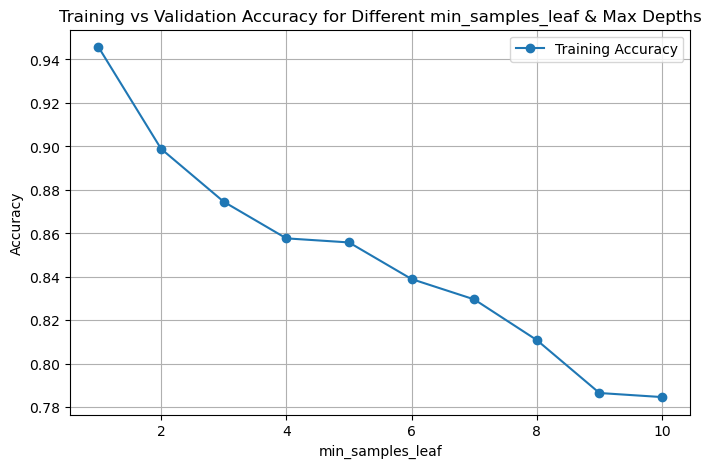

In [28]:
train_accuracies = []

for x in range(1,11):
    
    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_train)

    acc = rf.score(X_train, y_train)
    
    train_accuracies.append(acc)
    
    
    print(f'for min leaf samples = {x} and max depth = {11-x}, the accuracy is {round(acc,2)}')
    
# Plotting the accuracy trends after the loop completes
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_accuracies, label='Training Accuracy', marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Different min_samples_leaf & Max Depths')
plt.legend()
plt.grid(True)
plt.show()

> Q5) What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

max depth of 10 and min leaf sample of 1 works best because its asking the most questions of the data and requiring the least amount of samples

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [29]:
stats = []

for x in range(1,11):
    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_train)

    acc = rf.score(X_train, y_train)
    acc_val = rf.score(X_validate, y_validate)
    
    stats.append([x, 11-x,round(acc,2),round(acc_val,2) ]) 
    
#print(f'min_leaf_samples = {x}, max_depth = {11-x}, accuracy train = {round(acc,2)}, val = {round(acc_val,2)}')

In [30]:
stats_df = pd.DataFrame(stats, columns =['min_leaf','max_depth','train_acc','val_acc'])
stats_df

,min_leaf,max_depth,train_acc,val_acc
0,1,10,0.95,0.76
1,2,9,0.90,0.75
2,3,8,0.87,0.75
3,4,7,0.86,0.74
4,5,6,0.86,0.74
5,6,5,0.84,0.74
6,7,4,0.83,0.75
7,8,3,0.81,0.76
8,9,2,0.79,0.72
9,10,1,0.78,0.73


In [31]:
stats_df = pd.DataFrame(stats, columns =['min_leaf','max_depth','train_acc','val_acc'])
stats_df

,min_leaf,max_depth,train_acc,val_acc
0,1,10,0.95,0.76
1,2,9,0.90,0.75
2,3,8,0.87,0.75
3,4,7,0.86,0.74
4,5,6,0.86,0.74
5,6,5,0.84,0.74
6,7,4,0.83,0.75
7,8,3,0.81,0.76
8,9,2,0.79,0.72
9,10,1,0.78,0.73
